# Convolutional Neural Networks in Python with Keras
CNN is famous for image recognition and classification. The perpose of the project is to look a set of image data of different classes and classify them according to the class.

## Used Technology
    * Python3
    * Numpy
    * Pandas 
    * Matplotlib
    * Tensorflow
    * Keras


### Loading the Data :

In [13]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

### Analyze the Data :

In [14]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Test data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Test data shape :  (10000, 28, 28) (10000,)


```
****************************
From the above dataset we can see the training data has a shape of 60000x28x28 since there are 60000 training samples each of 28x28 dimension. 
similarly the test data has 10000x28x28 shape.
****************************
```

In [15]:
#finding the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


```
***************************
since we have 0-9 means 10 different classes or different type of grayscale images.
***************************
```

### Displaying the Images :

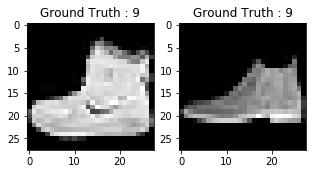

In [16]:
plt.figure(figsize=[5,5])

#display the first image in the training data
plt.subplot(121)
plt.imshow(train_X[0, : , :], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#display the first image in the test data
plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

```
*******
looks like an ankle boot :) .
*******
```


### Data Preprocessing : 
we have the images of 28x28 shape we need to preprocess(reshape) the datas in order to feed to the nurons.

In [17]:
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

```
*************
As we can see the data is in int8 format so before feeding into nuron we need to convert its type to float32 and also rescale the pixel value in range 0-1. 
*************
```

In [18]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255


```
******************
Now we need to convert the class labels (different type of images) into a one hot encoding vector because ML Algo can't understand Categorical data.

One Hot Encoding : convert categorical data into [1x10] vectors of each. Based on the number it arrange the vector. ex - [0 0 0 0 0 0 0 0 0 1] for label 9.
******************
```

In [19]:
#change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#display the change for category label using one-hot encoding
print("Original Label : ", train_Y[0])
print("After convertion to one-hot : ", train_Y_one_hot[0])

Original Label :  9
After convertion to one-hot :  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


### Dividing the dataset :  
    Dividing the dataset into train and test sets.
    train=80% test=20% .

In [20]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [21]:
#shapes lookup
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### The Network :

    The images are of size 28x28. we convert the pixel into 0-1 range and reshape the size to 28x28x1 and feed to the 
    nuron.
    
     Will use three convolutional layers :
         * The first layer will have 32-3x3 filters.
         * The second layer will have 64-3x3 filters.
         * The third layer will have 128-3x3 filters.
      
     In addition there are three max-pooling layers of each size        2x2.

### Model the Data : 

In [22]:
# importing libraries
import keras 
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [23]:
batch_size = 64
epochs = 2
num_classes = 10

### Nural Network Architeture :
    Frist we use the Conv2D() -> convolution nural network for 2 Dimension.Then Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since we have ten different classes, we'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable. Next we'll add the max-pooling layer with MaxPooling2D() and so on. The last layer has softmax activation function with 10 units which we need for multiclass-classification problem.

In [24]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

### Compile the Model :
    After the model is created we need to compile it using the Adam optimizer. One of the Most popular optimizer algorithm.

In [25]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [26]:
#visualizing the layer
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

### Train The Model :

In [27]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 121s 3ms/step - loss: 0.4623 - acc: 0.8314 - val_loss: 0.3217 - val_acc: 0.8848
Epoch 2/2
48000/48000 [==============================] - 123s 3ms/step - loss: 0.2833 - acc: 0.8972 - val_loss: 0.2737 - val_acc: 0.9028


In [28]:
#Model evaluation on Test Set
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.283337561655
Test accuracy: 0.8971


```
*********
The accuracy looks pretty impressive but under the hood its actually overfitted.
*********
```

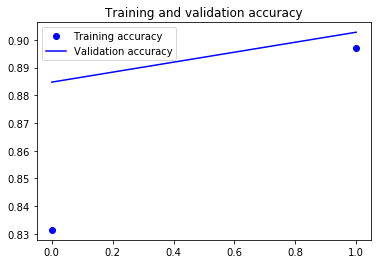

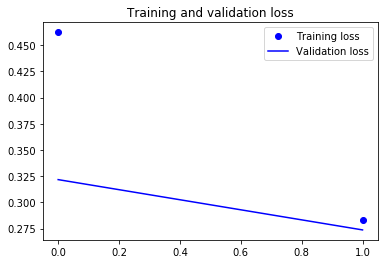

In [30]:
#let's plot the trainning and validation accuracy
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Adding Dropout into the Model :
    because we know we got more accuracy on training data rather then test data since we know the model is overfitted. To overcome this problem we need to add dropout.

In [31]:
batch_size = 64
epochs = 2
num_classes = 10

In [32]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [33]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [34]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [35]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 133s 3ms/step - loss: 0.5999 - acc: 0.7752 - val_loss: 0.3759 - val_acc: 0.8647
Epoch 2/2
48000/48000 [==============================] - 134s 3ms/step - loss: 0.3819 - acc: 0.8602 - val_loss: 0.3273 - val_acc: 0.8805


In [37]:
#fashion_model.save("fashion_model_dropout.h5py")



### Model Evaluation on the Test Set : 

In [38]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


10000/10000 [==============================] - 7s 732us/step


In [39]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.333044032407
Test accuracy: 0.8751


```
******************
 Looks like adding Dropout in our model worked
******************
```

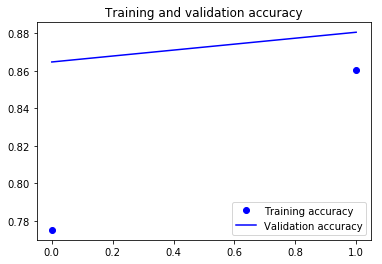

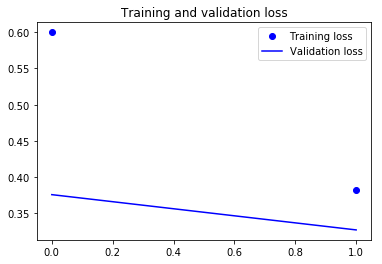

In [40]:
#plot the accuracy and loss plots
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict Labels : 

In [41]:
predicted_classes = fashion_model.predict(test_X)


In [42]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


Found 8618 correct labels


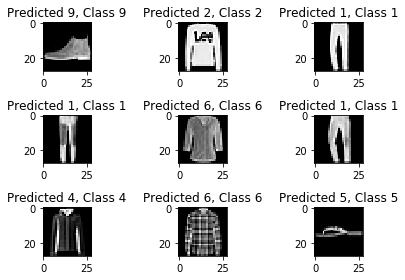

In [43]:
#correct prediction
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 8618 correct labels


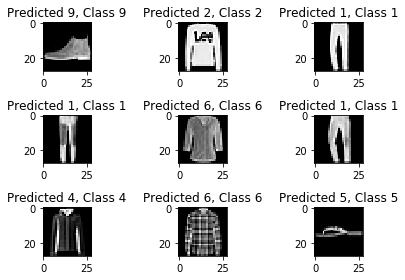

In [44]:
#incorrect prediction
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

### Classification Report :

In [45]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.61      0.82      0.70      1000
    Class 1       0.99      0.97      0.98      1000
    Class 2       0.92      0.64      0.75      1000
    Class 3       0.90      0.88      0.89      1000
    Class 4       0.76      0.82      0.79      1000
    Class 5       0.98      0.97      0.98      1000
    Class 6       0.69      0.65      0.67      1000
    Class 7       0.92      0.97      0.94      1000
    Class 8       0.98      0.96      0.97      1000
    Class 9       0.98      0.94      0.96      1000

avg / total       0.87      0.86      0.86     10000

